In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
print(df.head())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engagement_Score  Custo

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv")  
rows, columns = df.shape
print("total numbers", rows)
print("total columns", columns)

total numbers 22029
total columns 16


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [13]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [12]:
unique_campaigns = df['Campaign_ID'].nunique()
print("Number of unique Campaign_ID values:", unique_campaigns)

Number of unique Campaign_ID values: 22029


In [13]:
print("Unique Locations:")
print(df["Location"].unique())

Unique Locations:
['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']


In [14]:
print("\nUnique Customer Segments:")
print(df["Customer_Segment"].unique())


Unique Customer Segments:
['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [16]:
campaign_counts = df["Campaign_Type"].value_counts()
print(campaign_counts)

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64


In [17]:
channel_counts = df["Channel_Used"].value_counts()
print(channel_counts)

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


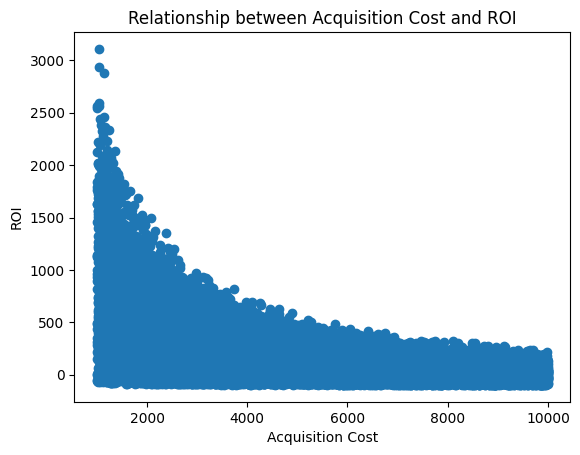

In [18]:
plt.scatter(df["Acquisition_Cost"], df["ROI"])
plt.xlabel("Acquisition Cost")
plt.ylabel("ROI")
plt.title("Relationship between Acquisition Cost and ROI")
plt.show()

<Figure size 1000x600 with 0 Axes>

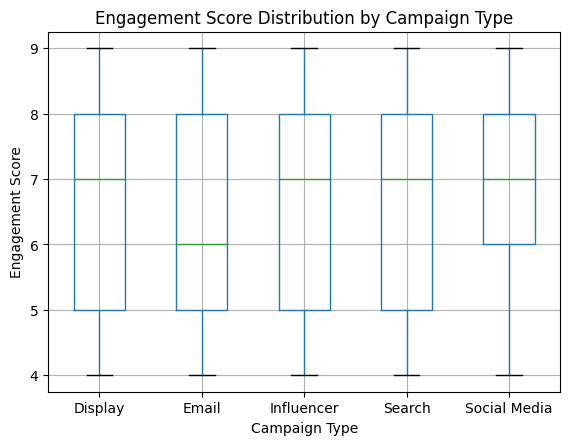

In [19]:
plt.figure(figsize=(10, 6))
df.boxplot(column="Engagement_Score", by="Campaign_Type")
plt.title("Engagement Score Distribution by Campaign Type")
plt.suptitle("")   # Removes the automatic matplotlib subtitle
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Score")
plt.show()

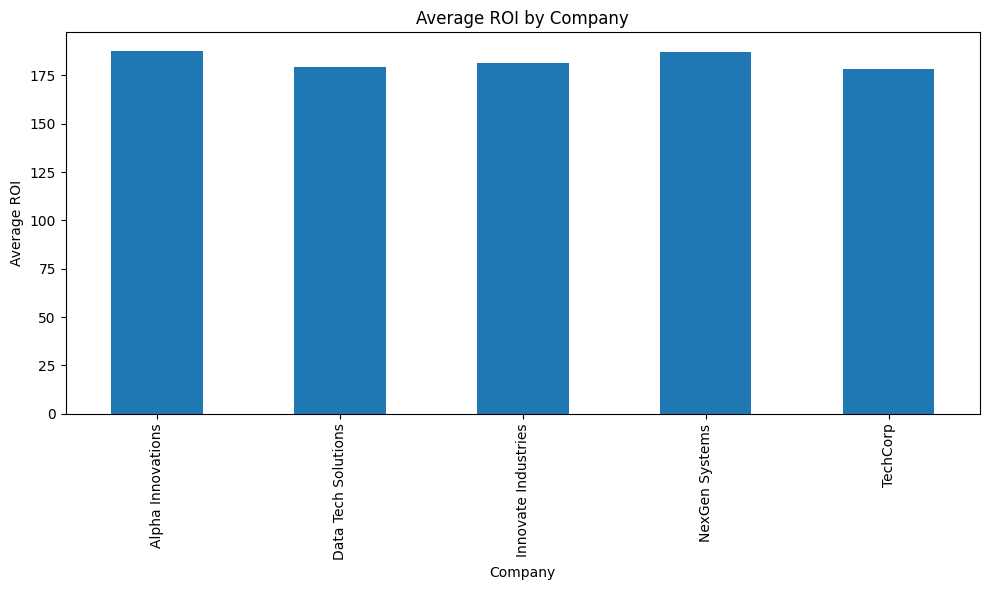

In [22]:
avg_roi = df.groupby("Company")["ROI"].mean()
plt.figure(figsize=(10, 6))
avg_roi.plot(kind="bar")
plt.xlabel("Company")
plt.ylabel("Average ROI")
plt.title("Average ROI by Company")
plt.xticks
plt.tight_layout()
plt.show()

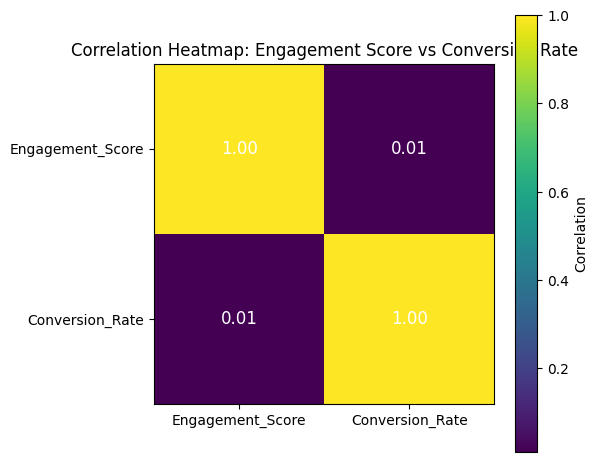

In [24]:
corr_matrix = df[["Engagement_Score", "Conversion_Rate"]].corr()
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        text = f"{corr_matrix.iloc[j, i]:.2f}"
        plt.text(i, j, text, ha='center', va='center', color="white", fontsize=12)
plt.title("Correlation Heatmap: Engagement Score vs Conversion Rate")
plt.tight_layout()
plt.show()

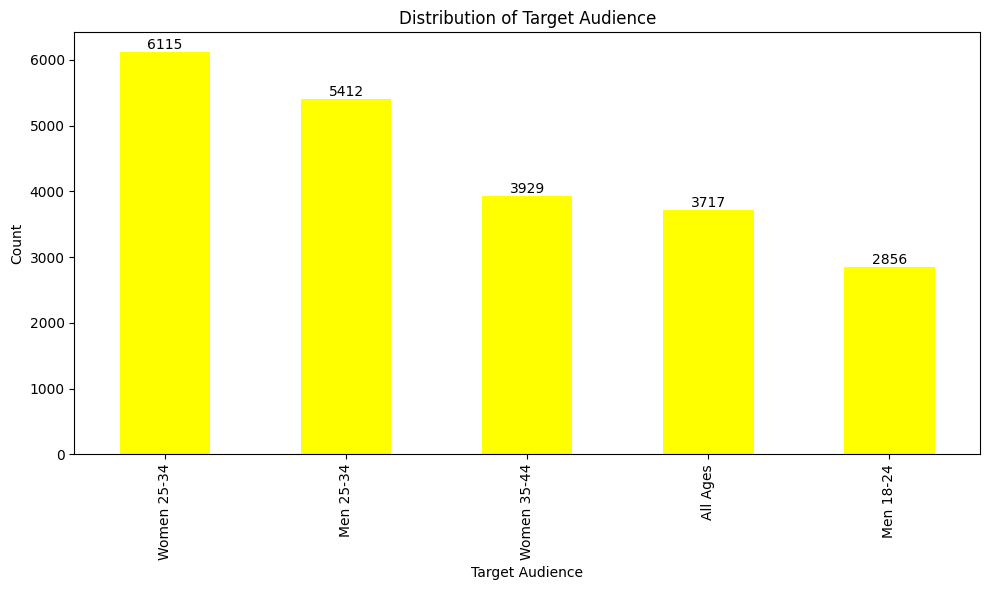

In [26]:
audience_counts = df["Target_Audience"].value_counts()
plt.figure(figsize=(10,6))
audience_counts.plot(kind="bar", color="yellow")
plt.xlabel("Target Audience")
plt.ylabel("Count")
plt.title("Distribution of Target Audience")
plt.xticks
for i, count in enumerate(audience_counts):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.tight_layout()
plt.show()

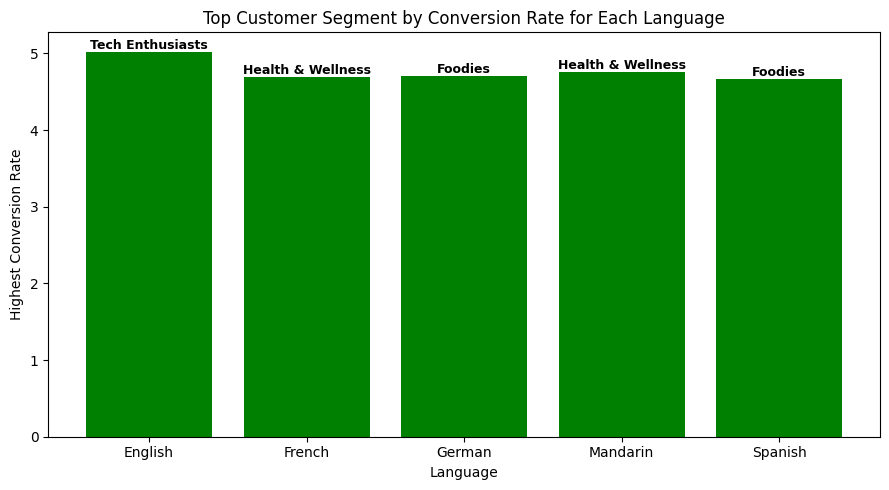

In [32]:
avg_conv = df.groupby(["Language", "Customer_Segment"])["Conversion_Rate"].mean().reset_index()
top_segments = avg_conv.loc[avg_conv.groupby("Language")["Conversion_Rate"].idxmax()]
plt.figure(figsize=(9,5))
bars = plt.bar(top_segments["Language"], top_segments["Conversion_Rate"], color="green")
plt.xlabel("Language")
plt.ylabel("Highest Conversion Rate")
plt.title("Top Customer Segment by Conversion Rate for Each Language")
plt.xticks
for bar, segment in zip(bars, top_segments["Customer_Segment"]):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        segment, 
        ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.tight_layout()
plt.show()

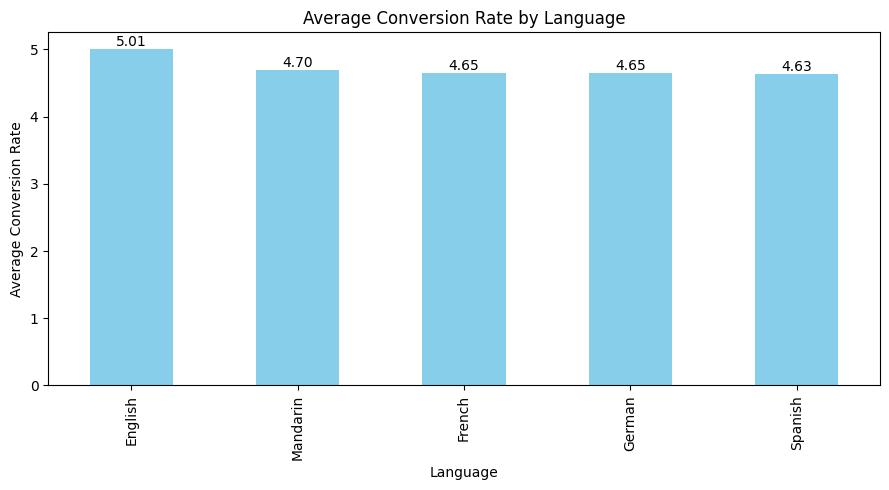

In [34]:
avg_conv = df.groupby("Language")["Conversion_Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(9,5))
bars = avg_conv.plot(kind="bar", color="skyblue")
plt.xlabel("Language")
plt.ylabel("Average Conversion Rate")
plt.title("Average Conversion Rate by Language")
plt.xticks
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center", va="bottom")
plt.tight_layout()
plt.show()

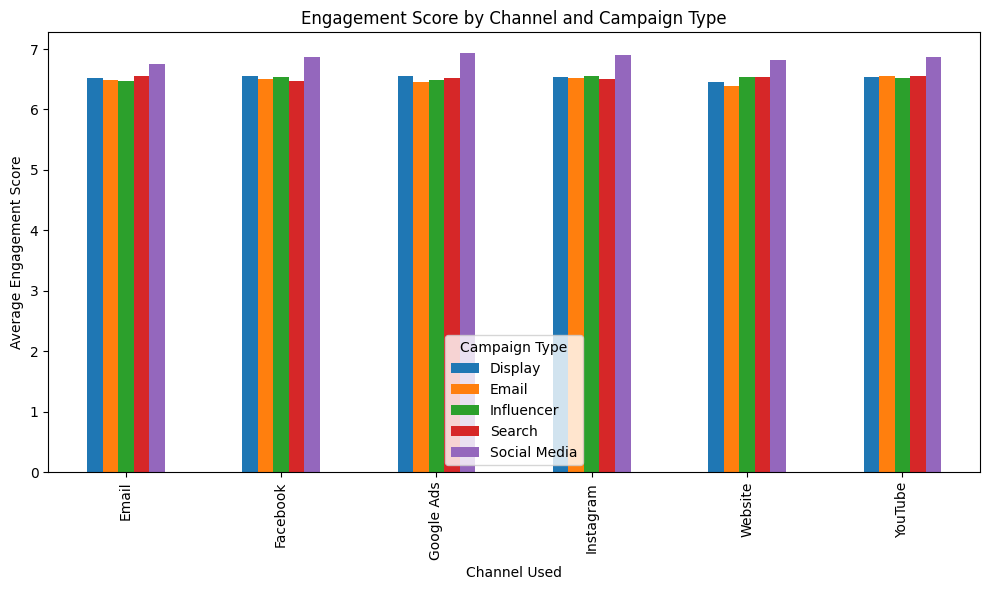

In [36]:
avg_engagement = df.groupby(["Channel_Used", "Campaign_Type"])["Engagement_Score"].mean().reset_index()
pivot_data = avg_engagement.pivot(index="Channel_Used", columns="Campaign_Type", values="Engagement_Score")
pivot_data.plot(kind="bar", figsize=(10,6))
plt.xlabel("Channel Used")
plt.ylabel("Average Engagement Score")
plt.title("Engagement Score by Channel and Campaign Type")
plt.xticks
plt.legend(title="Campaign Type")
plt.tight_layout()
plt.show()

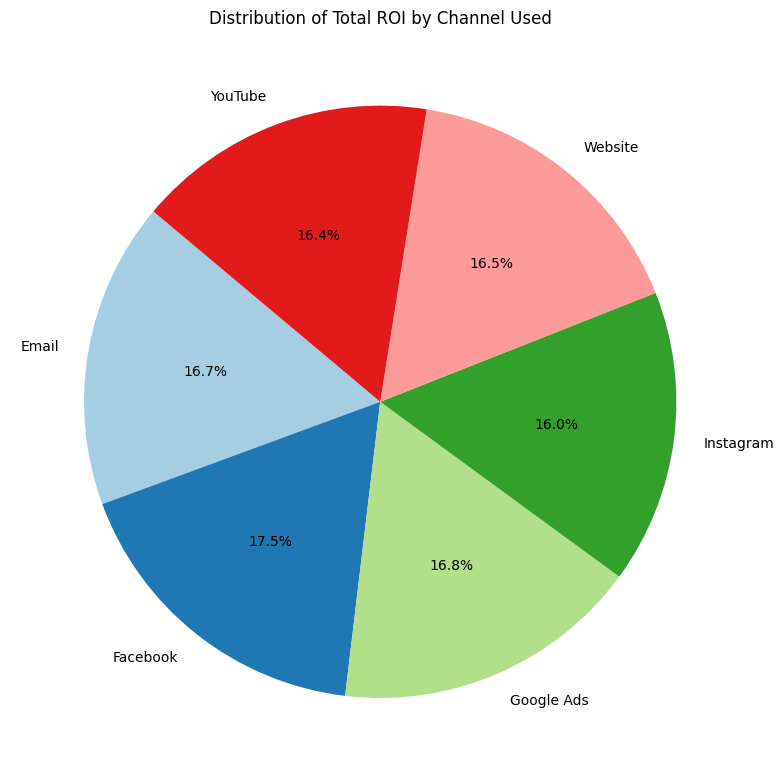

In [37]:
roi_by_channel = df.groupby("Channel_Used")["ROI"].sum()
plt.figure(figsize=(8,8))
plt.pie(
    roi_by_channel,
    labels=roi_by_channel.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors)
plt.title("Distribution of Total ROI by Channel Used")
plt.tight_layout()
plt.show()

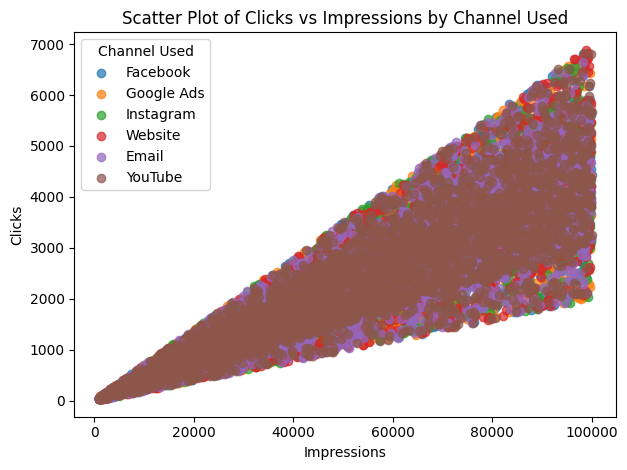

In [38]:
channels = df["Channel_Used"].unique()
colors = plt.cm.tab10.colors
for i, channel in enumerate(channels):
    subset = df[df["Channel_Used"] == channel]
    plt.scatter(
        subset["Impressions"], 
        subset["Clicks"], 
        color=colors[i % len(colors)], 
        label=channel, 
        alpha=0.7 )
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.title("Scatter Plot of Clicks vs Impressions by Channel Used")
plt.legend(title="Channel Used")
plt.tight_layout()
plt.show()



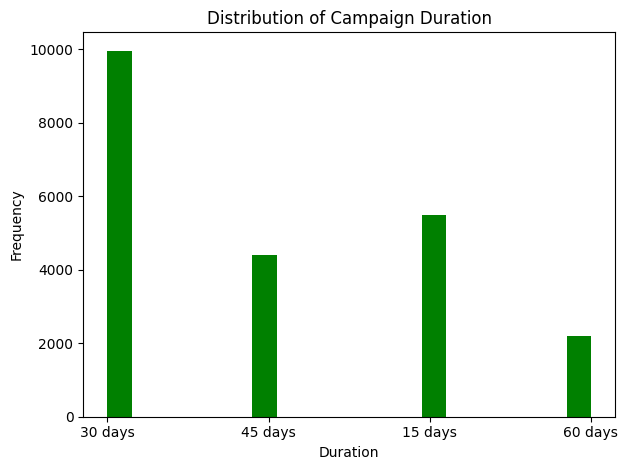

In [41]:
plt.hist(df["Duration"], bins=20, color="green")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Campaign Duration")
plt.tight_layout()
plt.show()

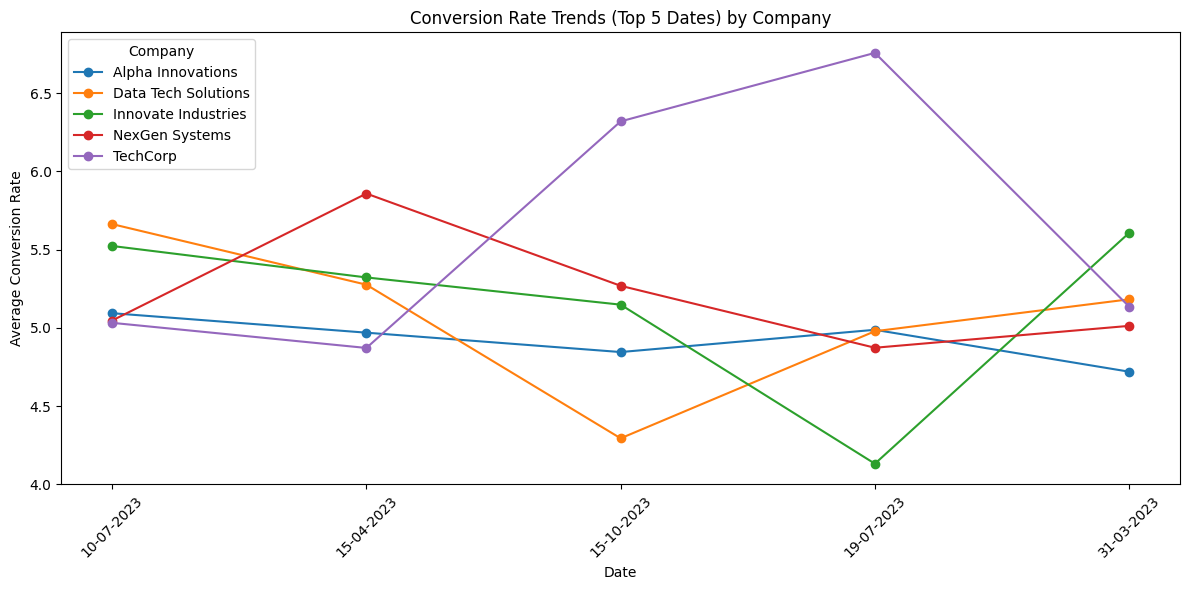

In [45]:
avg_conv = df.groupby(["Date", "Company"])["Conversion_Rate"].mean().reset_index()
top_dates = (
    avg_conv.groupby("Date")["Conversion_Rate"].mean()
    .sort_values(ascending=False)
    .head(5)
    .index)
filtered_data = avg_conv[avg_conv["Date"].isin(top_dates)]
pivot_data = filtered_data.pivot(index="Date", columns="Company", values="Conversion_Rate")
plt.figure(figsize=(12,6))
for company in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[company], marker="o", label=company)
plt.xlabel("Date")
plt.ylabel("Average Conversion Rate")
plt.title("Conversion Rate Trends (Top 5 Dates) by Company")
plt.legend(title="Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

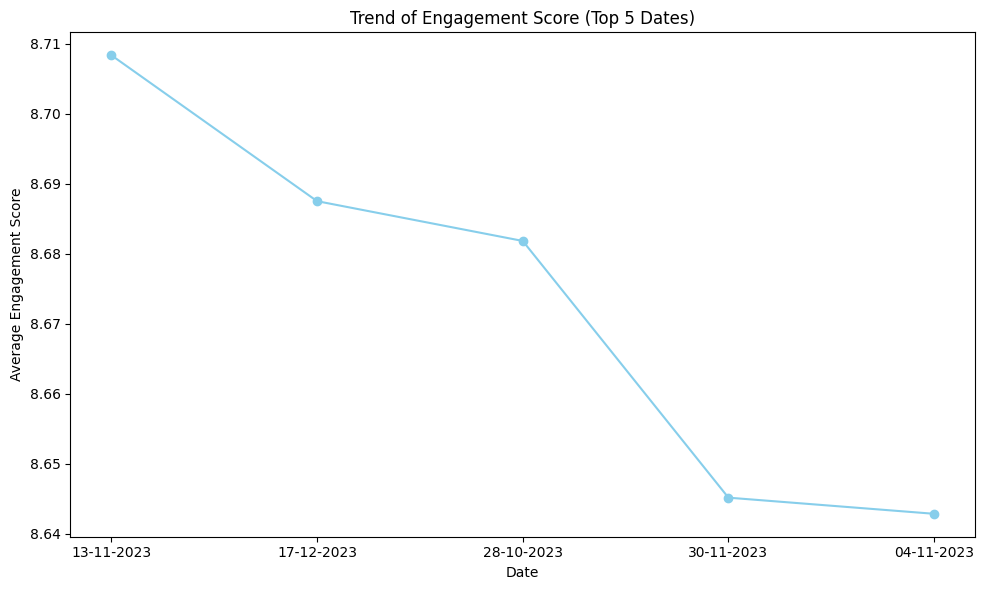

In [49]:
avg_engagement = df.groupby("Date")["Engagement_Score"].mean().reset_index()
top5_dates = avg_engagement.sort_values(by="Engagement_Score", ascending=False).head(5)
plt.figure(figsize=(10,6))
plt.plot(top5_dates["Date"], top5_dates["Engagement_Score"], marker="o", linestyle="-", color="skyblue")
plt.xlabel("Date")
plt.ylabel("Average Engagement Score")
plt.title("Trend of Engagement Score (Top 5 Dates)")
plt.xticks
plt.tight_layout()
plt.show()

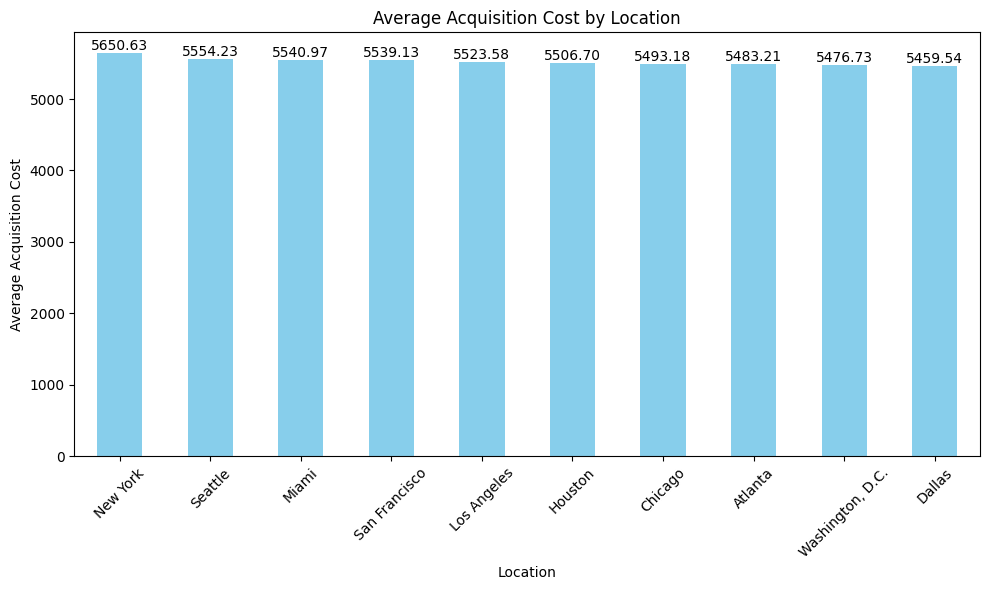

In [52]:
avg_cost = df.groupby("Location")["Acquisition_Cost"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = avg_cost.plot(kind="bar", color="skyblue")
plt.xlabel("Location")
plt.ylabel("Average Acquisition Cost")
plt.title("Average Acquisition Cost by Location")
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center", va="bottom")
plt.tight_layout()
plt.show()

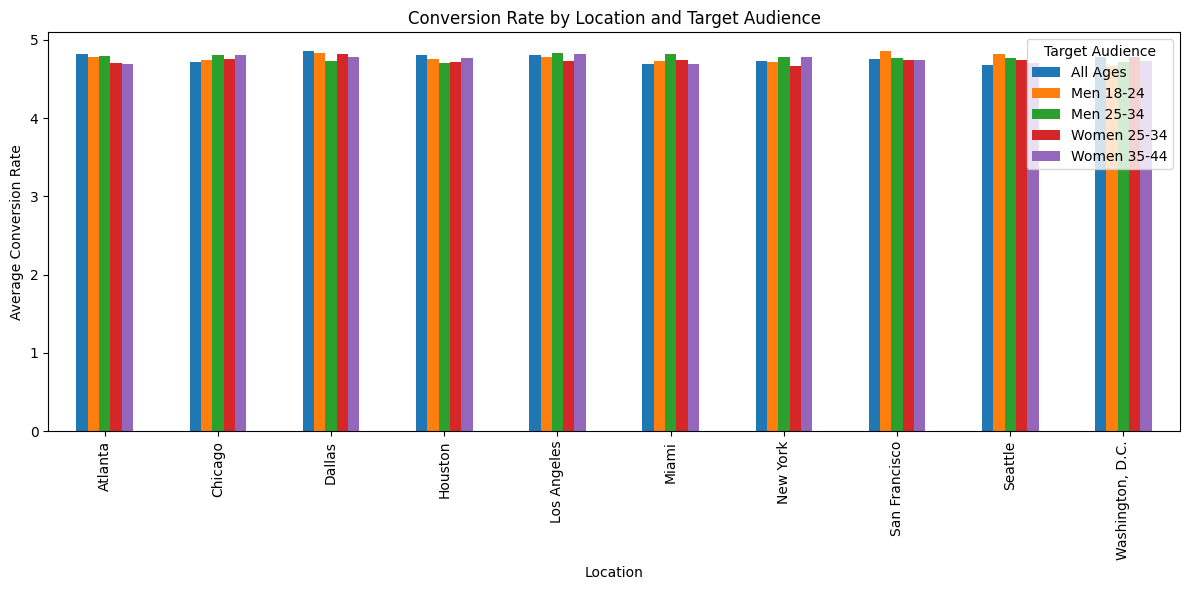

In [54]:
avg_conv = df.groupby(["Location", "Target_Audience"])["Conversion_Rate"].mean().reset_index()
pivot_data = avg_conv.pivot(index="Location", columns="Target_Audience", values="Conversion_Rate")
pivot_data.plot(kind="bar", figsize=(12,6))
plt.xlabel("Location")
plt.ylabel("Average Conversion Rate")
plt.title("Conversion Rate by Location and Target Audience")
plt.xticks()
plt.legend(title="Target Audience")
plt.tight_layout()
plt.show()

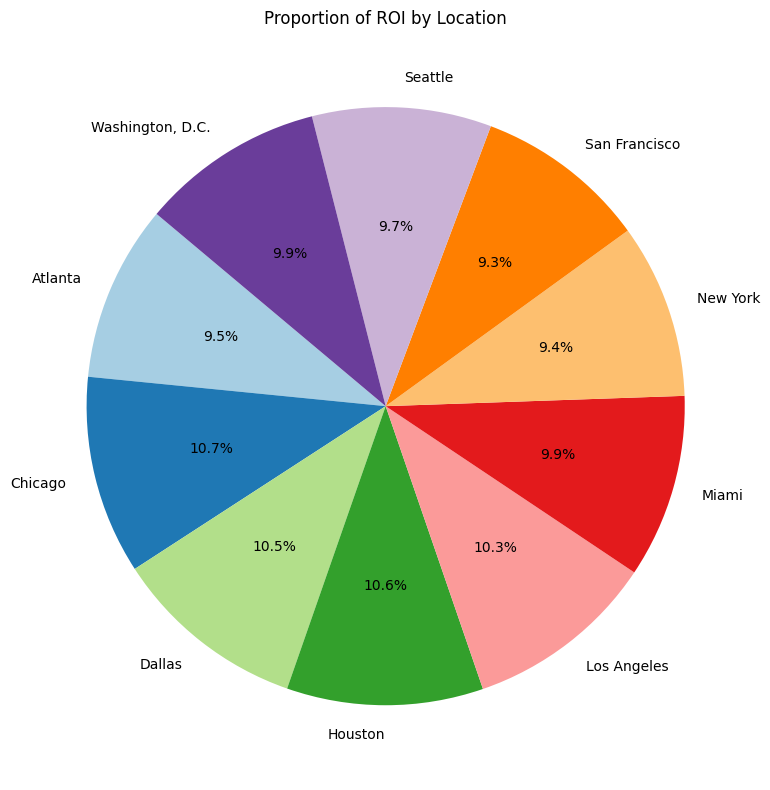

In [55]:
roi_by_location = df.groupby("Location")["ROI"].sum()
plt.figure(figsize=(8,8))
plt.pie(
    roi_by_location,
    labels=roi_by_location.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors)
plt.title("Proportion of ROI by Location")
plt.tight_layout()
plt.show()